In [33]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Lendo a base da dados
df = pd.read_csv('../datasets/house_prices.csv')

In [3]:
# Separando o target
X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

In [4]:
# Dividindo o dataframe em treino e teste para o target e as features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# nulos treino
nulos_train = X_train.select_dtypes(include=np.number).isnull().sum()

nulos[nulos > 0]

LotFrontage    217
MasVnrArea       6
GarageYrBlt     64
dtype: int64

In [8]:
# nulos teste
nulos_teste = X_test.select_dtypes(include=np.number).isnull().sum()

nulos_teste[nulos_teste > 0]

LotFrontage    42
MasVnrArea      2
GarageYrBlt    17
dtype: int64

In [9]:
# Utilizando somente dados numéricos e sem nulos
X_train_model = X_train.select_dtypes(include=np.number).dropna(axis="columns")

# usando o .loc no final, pra garantir que pegamos exatamente as mesmas features
X_test_model = X_test.loc[:, X_train_model.columns]

In [13]:
# Garantindo que dados de treino e teste tenham a mesma dimensão e sem dados nulos
assert (X_train_model.shape[1] == X_test_model.shape[1])
assert (X_test_model.isnull().sum().sum() == 0)

X_train_model.shape, X_test_model.shape

((1168, 33), (292, 33))

In [15]:
# Calculando o r² ajustado
def calc_r2_adj(r2, y, X):

    return 1 - (1-r2)*(len(y) - 1)/(len(y) - X.shape[1] - 1)

In [18]:
def plot_scatter_real_pred(y_test, y_pred):

    x = np.linspace(0, y_test.max())
    y = x

    plt.title("Target real x target predito")

    plt.plot(x, y, color="red", ls=":")

    sns.scatterplot(x=y_test, y=y_pred)

    plt.xlabel("Real")
    plt.ylabel("Predito")

    plt.show()

In [16]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)

    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    r2_adj = calc_r2_adj(r2, y_test, X_test)

    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()

    # new: returnando o objeto do modelo treinado!
    return reglin


Métricas de avaliação (dados de teste):



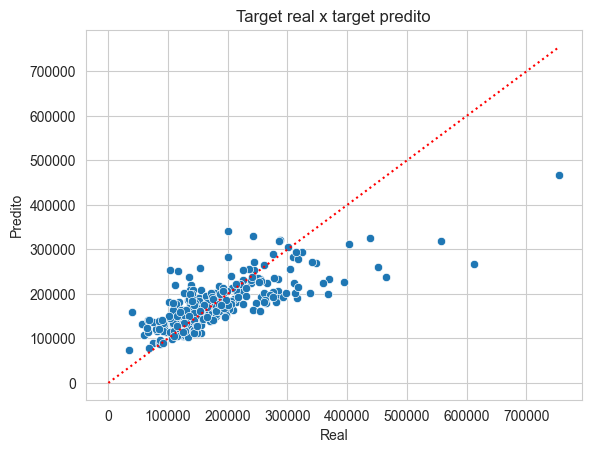

R^2: 0.55 | Adj R^2: 0.55
MAE: 38341.20
RMSE: 58471.76
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3515.754922
std       58466.163367
min     -149347.637583
25%      -30951.653433
50%       -2718.855323
75%       21621.209371
max      344473.352964
Name: SalePrice, dtype: float64


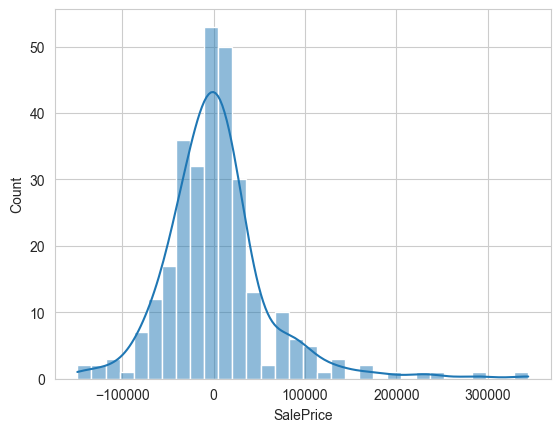

In [26]:
reglin_simples = reg_lin_pt1_pt2(X_train_model["GrLivArea"].values.reshape(-1, 1), y_train,
                                 X_test_model["GrLivArea"].values.reshape(-1, 1), y_test,
                                 plot=True)


Métricas de avaliação (dados de teste):



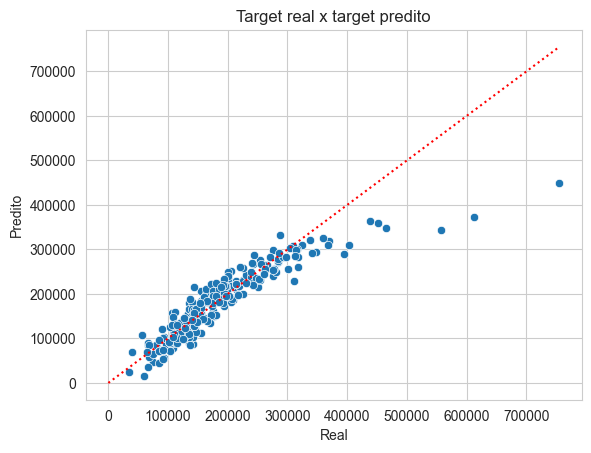

R^2: 0.82 | Adj R^2: 0.80
MAE: 22938.25
RMSE: 37312.27
MAPE: 13.45%

Distribuição dos resíduos:

count       292.000000
mean       3906.261898
std       37170.936225
min      -72360.843025
25%      -16250.719394
50%         862.782726
75%       16069.854162
max      306279.161692
Name: SalePrice, dtype: float64


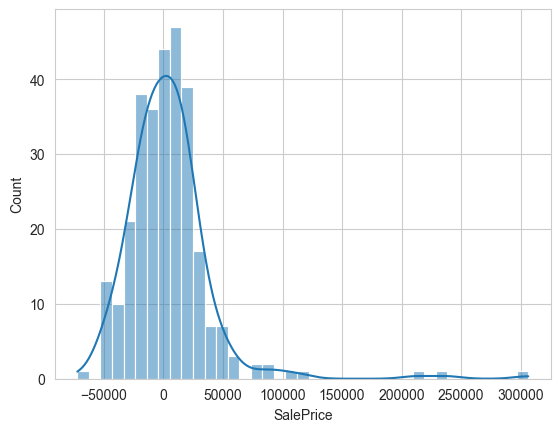

In [27]:
reglin_multi = reg_lin_pt1_pt2(X_train_model, y_train,
                                 X_test_model, y_test,
                                 plot=True)

In [29]:
# Atributos da regressão linear simples
vars(reglin_simples)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([102.48895892]),
 'rank_': 1,
 'singular_': array([17915.34517326]),
 'intercept_': 24899.74815733818}

In [30]:
# Atributos da regressão linear multipla
vars(reglin_multi)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'], dtype=object),
 'n_features_in_': 33,
 'coef_': array([-1.75548690e+02,  4.09174234e-01,  1.84955503e+04,  3.83573710e+03,
         3.37312908e+02,  1.80209917e+02,  1.00461555e+01, -4.61607099e+00,
         3.82786747e-01,  5.81287122e+00,  1.31240039e+01,  1.42134340e+01,
         4.50422890e+00,  3.18416668e+01,  1.10492803e+04, -3.26518493e+02,
 

In [31]:
# Dataframe com o coef de cada feature
params_df = pd.DataFrame(reglin_multi.coef_, index=reglin_multi.feature_names_in_, columns=["param_value"])

params_df

,param_value
MSSubClass,-175.548690
LotArea,0.409174
OverallQual,18495.550309
OverallCond,3835.737095
YearBuilt,337.312908
YearRemodAdd,180.209917
BsmtFinSF1,10.046155
BsmtFinSF2,-4.616071
BsmtUnfSF,0.382787
TotalBsmtSF,5.812871


In [32]:
# Verificando escala das features
X_train_model.describe().loc[["min", "max"]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1127.0,2336.0,6110.0,...,1418.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [34]:
# Colocando as features na mesma escala
mms = MinMaxScaler().fit(X_train_model)
X_train_model_mms = pd.DataFrame(mms.transform(X_train_model), columns=X_train_model.columns, index=X_train_model.index)
X_test_model_mms = pd.DataFrame(mms.transform(X_test_model), columns=X_test_model.columns, index=X_test_model.index)

In [35]:
X_train_model_mms.describe().loc[['min', 'max']]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
X_test_model_mms.describe().loc[['min', 'max']]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.000893,0.111111,0.125,0.057971,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00000,0.0,0.0
max,1.0,0.324668,1.000000,1.000,0.992754,1.0,0.387668,1.307897,0.874144,0.524714,...,0.980254,0.543757,0.500914,0.576087,0.468504,0.825,0.780488,0.03871,1.0,1.0


In [40]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True, scale_mms=False):

    if scale_mms:

        mms = MinMaxScaler().fit(X_train)

        # passamos assim, pra carregar o nome das features, e ter o .feature_names_in_
        X_train = pd.DataFrame(mms.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

    #         X_train = mms.transform(X_train)
    #         X_test = mms.transform(X_test)

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)

    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    r2_adj = calc_r2_adj(r2, y_test, X_test)

    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()

    # new: returnando o objeto do modelo treinado!
    return reglin


Métricas de avaliação (dados de teste):



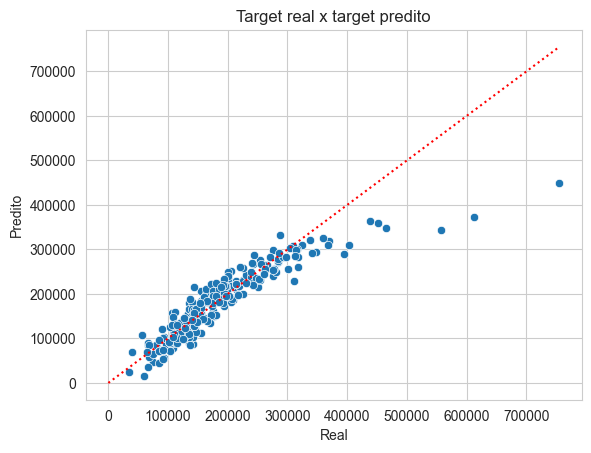

R^2: 0.82 | Adj R^2: 0.80
MAE: 22940.72
RMSE: 37316.38
MAPE: 13.45%

Distribuição dos resíduos:

count       292.000000
mean       3903.959068
std       37175.315065
min      -72370.595187
25%      -16258.855341
50%         857.495237
75%       16064.954677
max      306336.546708
Name: SalePrice, dtype: float64


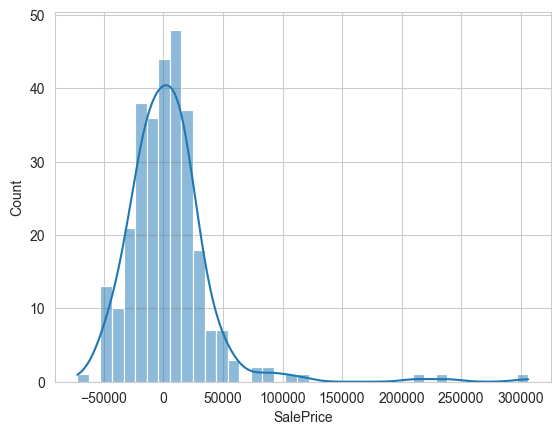

,param_value
MSSubClass,-2.987006e+04
LotArea,8.758705e+04
OverallQual,1.665120e+05
OverallCond,3.070683e+04
YearBuilt,4.657209e+04
YearRemodAdd,1.079977e+04
BsmtFinSF1,3.235719e+16
BsmtFinSF2,6.461119e+15
BsmtUnfSF,1.339235e+16
TotalBsmtSF,-3.502878e+16


In [41]:
reglin_multi_mms = reg_lin_pt1_pt2(X_train_model, y_train,
                                   X_test_model, y_test,
                                   plot=True, scale_mms=True)

params_df = pd.DataFrame(reglin_multi_mms.coef_, index=reglin_multi_mms.feature_names_in_, columns=["param_value"])

params_df

In [42]:
# lista com as 10 features mais importantes
params_df.abs().sort_values("param_value", ascending=False)[:10].index.tolist()

['GrLivArea',
 '1stFlrSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'LowQualFinSF',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'OverallQual',
 'LotArea']

In [43]:
def calc_reg_metrics(model, X, y, label="", plot=False):

    y_pred = model.predict(X)

    print(f"\nMétricas de avaliação (dados de {label}):\n")

    if plot:
        plot_scatter_real_pred(y, y_pred)

    r2 = r2_score(y, y_pred)
    r2_adj = calc_r2_adj(r2, y, X)

    print(f"R^2: {r2:.2f} | Adj R^2: {r2_adj:.2f}")
    print(f"MAE: {mean_absolute_error(y, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y, y_pred))*100:.2f}%")

    residuos = y - y_pred
    print(f"\nDistribuição dos resíduos de {label}:\n")
    print(residuos.describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()

In [44]:
def calc_reg_metrics(model, X, y, label="", plot=False, dist_resids=True, print_stuff=True):

    y_pred = model.predict(X)

    if print_stuff:
        print(f"\nMétricas de avaliação (dados de {label}):\n")

    if plot:
        plot_scatter_real_pred(y, y_pred)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = mean_absolute_percentage_error(y, y_pred)

    if print_stuff:
        print(f"R^2: {r2:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape:.2%}")

    if dist_resids:
        residuos = y - y_pred
        print(f"\nDistribuição dos resíduos de {label}:\n")
        print(pd.Series(residuos).describe())

    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()

    # retorna um dicionário com as métricas
    metrics_dict = {"r2" : r2,
                    "mae" : mae,
                    "rmse" : rmse,
                    "mape" : mape}

    return metrics_dict


In [45]:
def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True, scale_mms=False, train_metrics=True):

    if scale_mms:

        mms = MinMaxScaler().fit(X_train)

        # passamos assim, pra carregar o nome das features, e ter o .feature_names_in_
        X_train = pd.DataFrame(mms.transform(X_train), columns=X_train.columns, index=X_train.index)
        X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    if train_metrics:
        calc_reg_metrics(reglin, X_train, y_train, label="treino", plot=plot, dist_resids=False)
        print()
        print("#"*50)

    calc_reg_metrics(reglin, X_test, y_test, label="teste", plot=plot, dist_resids=False)

    # new: returnando o objeto do modelo treinado!
    return reglin